In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import analyze_cells_energy as ace
import re
import utils
import itertools
import seaborn as sns
import utils_PLS as upls

In [2]:
# load query file where we added volumes for each area
volumes = ace.clean_volumes_database()

In [3]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'BL_woF'
batch='BL_woF2000'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_BL_woF2000.npy', 
                                   allow_pickle=True).item()

In [4]:
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)

# Format data for task PLS

In [5]:
data_ncells = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='n_cells')
data_energy = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='energy')
data_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                    batch=batch, table='density')
data_relative_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                             batch=batch, table='relative_density')
data_ncells.dropna(inplace=True, axis=1)
data_energy.dropna(inplace=True, axis=1)
data_density.dropna(inplace=True, axis=1)
data_relative_density.dropna(inplace=True, axis=1)
data_ncells.to_csv('./results_pls/'+batch+'_n_cells.csv')
data_energy.to_csv('./results_pls/'+batch+'_energy.csv')
data_density.to_csv('./results_pls/'+batch+'_density.csv')
data_relative_density.to_csv('./results_pls/'+batch+'_relative_density.csv')

# Format data for hierarchy plotting

In [6]:
df_levels= upls.create_df_levels(volumes)

# Apply task PLS

In [7]:
%%bash
python area_pls.py -i results_pls/BL_woF2000_n_cells.csv -o './results_pls/BL_woF2000_ncells'

In [8]:
%%bash
python area_pls.py -i results_pls/BL_woF2000_energy.csv -o './results_pls/BL_woF2000_energy'

In [9]:
%%bash
python area_pls.py -i results_pls/BL_woF2000_density.csv -o './results_pls/BL_woF2000_density'

In [10]:
%%bash
python area_pls.py -i results_pls/BL_woF2000_relative_density.csv -o './results_pls/BL_woF2000_relative_density'

# Plot results

In [11]:
contrasts = pd.read_csv('./results_pls/BL_woF2000_contrasts.csv')
saliences = pd.read_csv('./results_pls/BL_woF2000_saliences.csv')
contrasts = contrasts.rename(columns={"group_Control": "Control", "group_Fam": "Fam", "group_Unfam":"Unfam"})

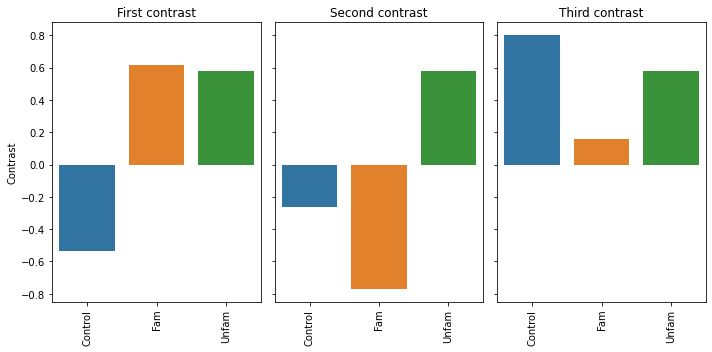

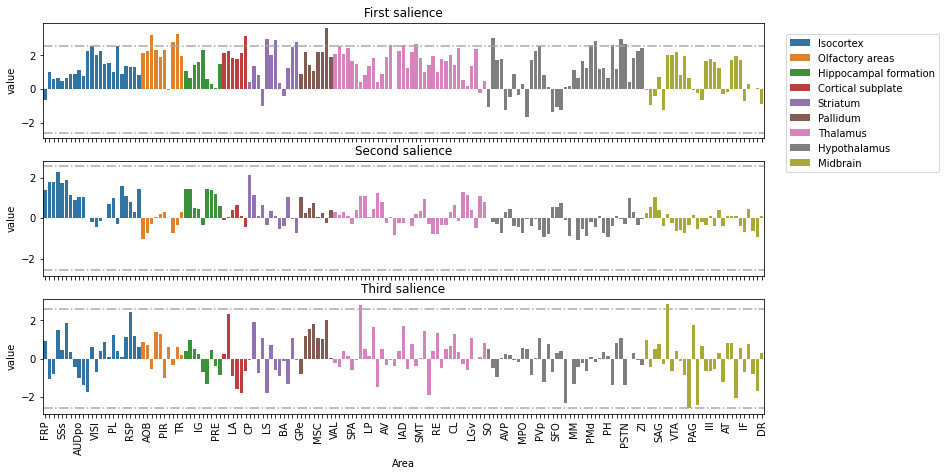

In [12]:
upls.plot_panel_contrasts(batch='BL_woF2000', variable='ncells')
upls.plot_panel_saliences(batch='BL_woF2000', variable='ncells', df_levels=df_levels)

# PLS energy

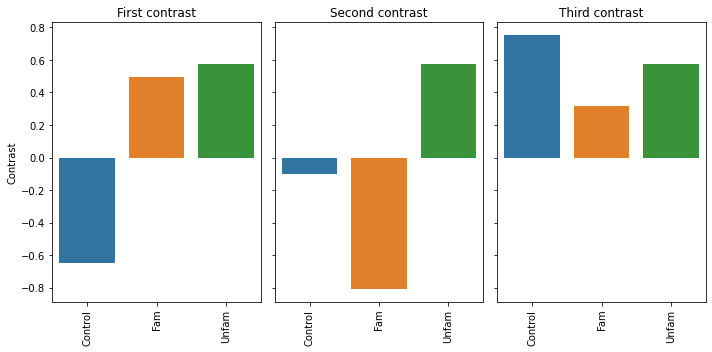

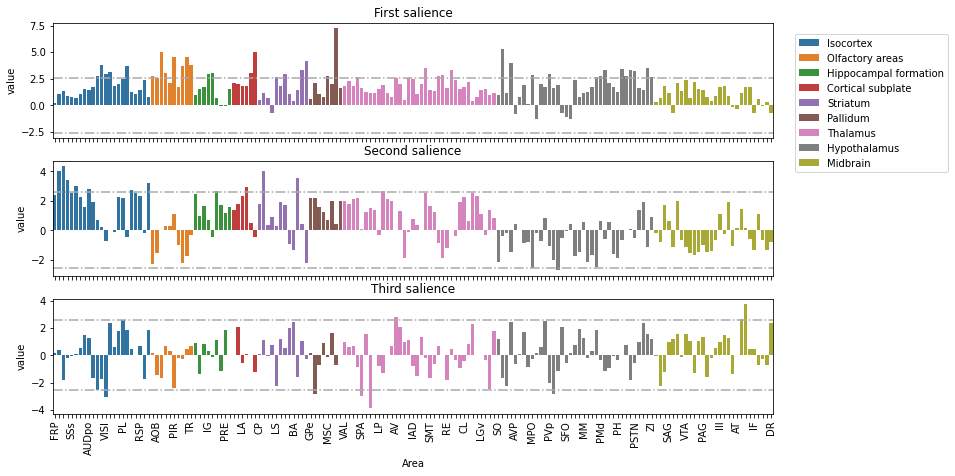

In [13]:
upls.plot_panel_contrasts(batch='BL_woF2000', variable='energy')
upls.plot_panel_saliences(batch='BL_woF2000', variable='energy', df_levels=df_levels)

# PLS density

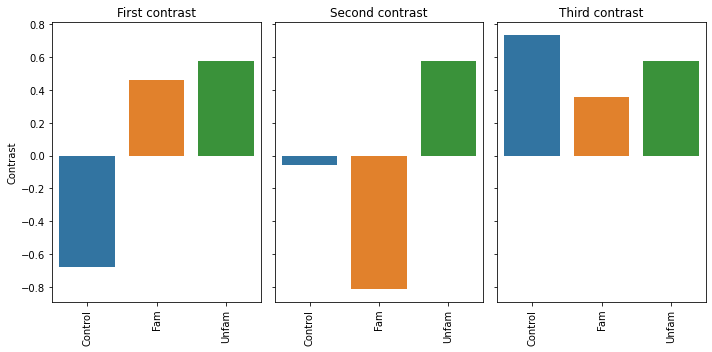

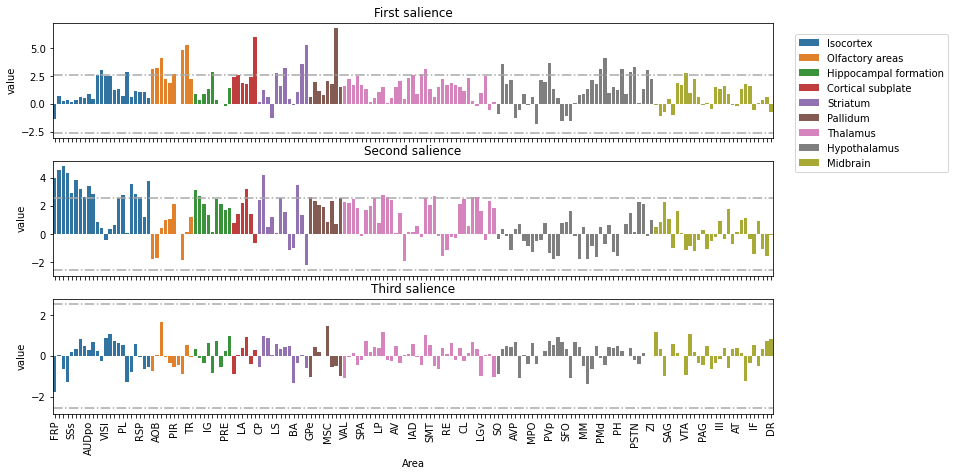

In [14]:
upls.plot_panel_contrasts(batch='BL_woF2000', variable='density')
upls.plot_panel_saliences(batch='BL_woF2000', variable='density', df_levels=df_levels)

# PLS relative density

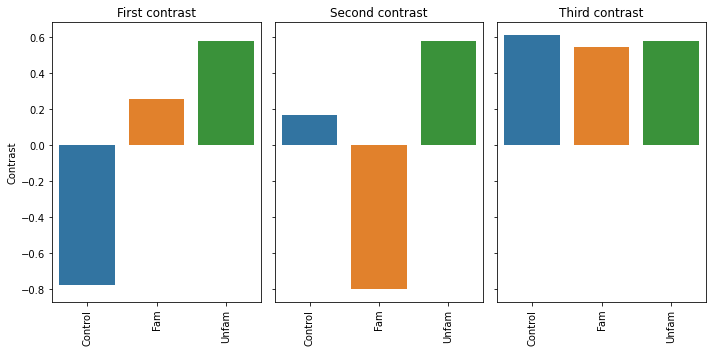

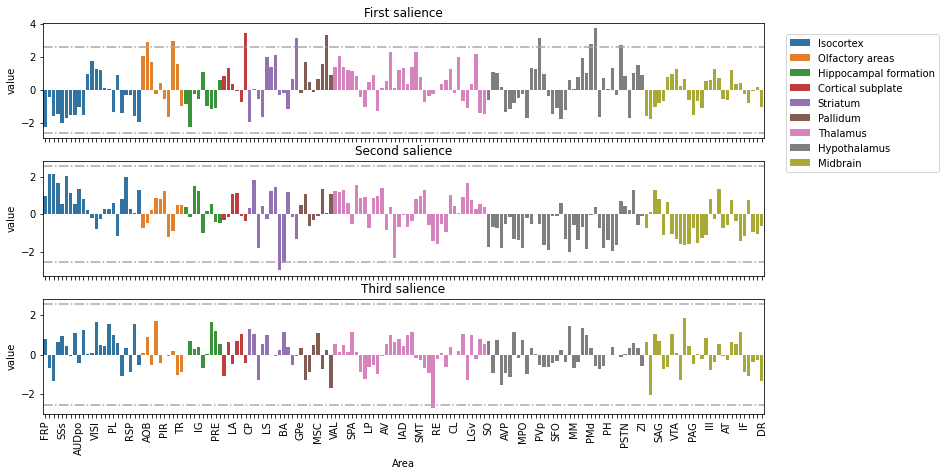

In [15]:
upls.plot_panel_contrasts(batch='BL_woF2000', variable='relative_density')
upls.plot_panel_saliences(batch='BL_woF2000', variable='relative_density', df_levels=df_levels)

# Identify area overlap

In [16]:
overlap = {'ncells':[], 'energy':[], 'density':[], 'relative_density':[]}
for variable in overlap.keys():
    overlap[variable] = set(upls.identify_pls_sig_areas(saliences=pd.read_csv(
        './results_pls/'+ batch +'_'+ variable +'_saliences.csv'), 
                                           threshold=1.96, 
                                           volumes=volumes))
[len(overlap[key]) for key in overlap.keys()]


[60, 109, 98, 31]

In [17]:
overlap['relative_density']

{'Accessory olfactory bulb',
 'Agranular insular area',
 'Anterior amygdalar area',
 'Anterodorsal nucleus',
 'Anteromedial nucleus',
 'Bed nuclei of the stria terminalis',
 'Bed nucleus of the accessory olfactory tract',
 'Cortical amygdalar area',
 'Dentate gyrus',
 'Dorsal premammillary nucleus',
 'Frontal pole cerebral cortex',
 'Inferior colliculus',
 'Lateral hypothalamic area',
 'Lateral mammillary nucleus',
 'Lateral septal nucleus',
 'Main olfactory bulb',
 'Medial amygdalar nucleus',
 'Mediodorsal nucleus of thalamus',
 'Parafascicular nucleus',
 'Parataenial nucleus',
 'Periventricular hypothalamic nucleus posterior part',
 'Posterior amygdalar nucleus',
 'Preparasubthalamic nucleus',
 'Primary motor area',
 'Secondary motor area',
 'Septohippocampal nucleus',
 'Subgeniculate nucleus',
 'Supplemental somatosensory area',
 'Ventral medial nucleus of the thalamus',
 'Ventral premammillary nucleus',
 'Visceral area'}

In [18]:
# union between areas significant in all analyses
all_areas = overlap['ncells'].union(overlap['energy']).union(overlap['density']).union(overlap['relative_density'])
# intersection between areas significant in all analyses
intersection = overlap['ncells'].intersection(overlap['energy']).intersection(
    overlap['density']).intersection(overlap['relative_density'])
# filtering
intersection

{'Accessory olfactory bulb',
 'Anteromedial nucleus',
 'Bed nuclei of the stria terminalis',
 'Cortical amygdalar area',
 'Dorsal premammillary nucleus',
 'Lateral hypothalamic area',
 'Lateral septal nucleus',
 'Main olfactory bulb',
 'Medial amygdalar nucleus',
 'Mediodorsal nucleus of thalamus',
 'Parafascicular nucleus',
 'Periventricular hypothalamic nucleus posterior part',
 'Posterior amygdalar nucleus',
 'Preparasubthalamic nucleus',
 'Septohippocampal nucleus',
 'Ventral medial nucleus of the thalamus',
 'Ventral premammillary nucleus'}

In [19]:
wof_rd = overlap['relative_density']
wof_rd

{'Accessory olfactory bulb',
 'Agranular insular area',
 'Anterior amygdalar area',
 'Anterodorsal nucleus',
 'Anteromedial nucleus',
 'Bed nuclei of the stria terminalis',
 'Bed nucleus of the accessory olfactory tract',
 'Cortical amygdalar area',
 'Dentate gyrus',
 'Dorsal premammillary nucleus',
 'Frontal pole cerebral cortex',
 'Inferior colliculus',
 'Lateral hypothalamic area',
 'Lateral mammillary nucleus',
 'Lateral septal nucleus',
 'Main olfactory bulb',
 'Medial amygdalar nucleus',
 'Mediodorsal nucleus of thalamus',
 'Parafascicular nucleus',
 'Parataenial nucleus',
 'Periventricular hypothalamic nucleus posterior part',
 'Posterior amygdalar nucleus',
 'Preparasubthalamic nucleus',
 'Primary motor area',
 'Secondary motor area',
 'Septohippocampal nucleus',
 'Subgeniculate nucleus',
 'Supplemental somatosensory area',
 'Ventral medial nucleus of the thalamus',
 'Ventral premammillary nucleus',
 'Visceral area'}

In [20]:
variable='relative_density'
batch='BL_woF2000'
np.save('results_pls/pls_sig_areas_BL_woF2000.npy', upls.identify_pls_sig_areas(saliences=pd.read_csv(
        './results_pls/'+ batch +'_'+ variable +'_saliences.csv'), 
                                           threshold=2.56, 
                                           volumes=volumes))